## Visual story telling part 2: Capital Metro data

- _timestamp_: the beginning of the 15-minute window for that row of data
- _boarding_: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
- _alighting_: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
- _day_of_week_ and _weekend_: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
- _temperature_: temperature at that time in degrees F
- _hour_of_day_: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
- _month_: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question.  Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning.  Rather, the figure together with a concise caption should speak for itself as far as possible. 

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing.  (Faceting/panel plots might be especially useful here.)  

In [2]:
##CapMetro
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('capmetro_UT.csv')
df.head()
day_of_week_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}

df['day_number'] = df['day_of_week'].map(day_of_week_mapping)

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['month_number'] = df['month'].map(month_mapping)

weekend_mapping = {'Mon': 0, 'Tue': 0, 'Wed': 0, 'Thu': 0, 'Fri': 0, 'Sat': 1, 'Sun': 1}

df['is_weekend'] = df['day_of_week'].map(weekend_mapping)

df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,day_number,month_number,is_weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,6,9,1
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,6,9,1
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend,6,9,1
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend,6,9,1
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend,6,9,1


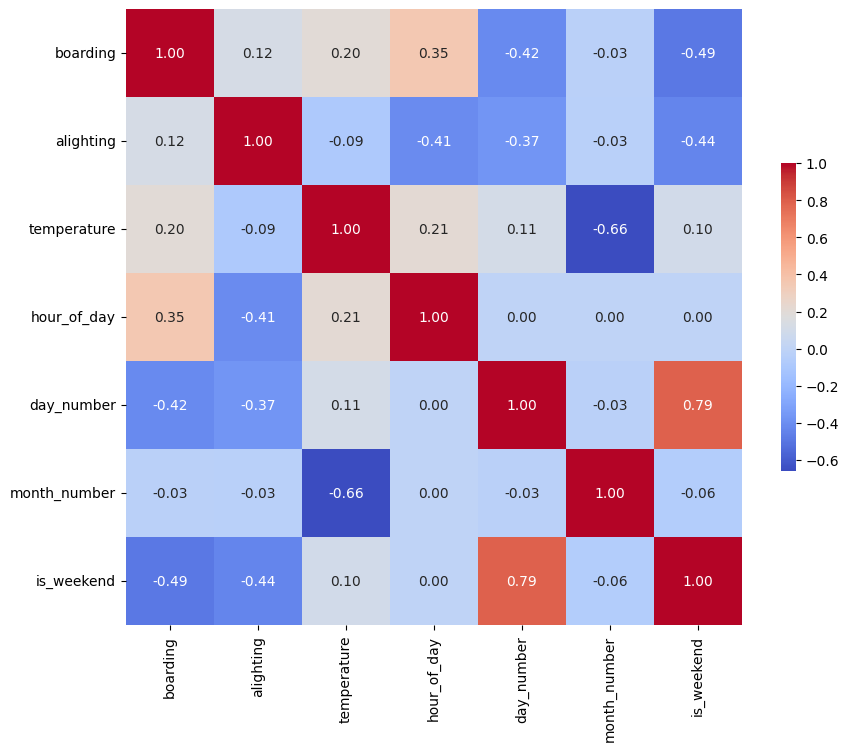

In [3]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.show()

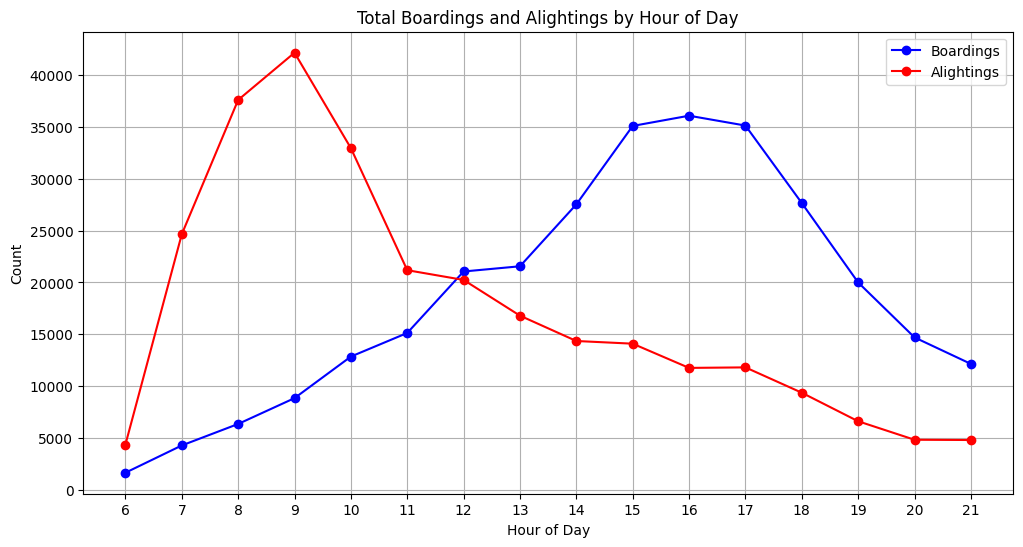

In [4]:
# prompt: give me a time serires gaph for hour_of_day vs (boarding and alightning

import matplotlib.pyplot as plt
# Group the data by hour of day and calculate the total boardings and alightings
hourly_boardings = df.groupby('hour_of_day')['boarding'].sum().reset_index()
hourly_alightings = df.groupby('hour_of_day')['alighting'].sum().reset_index()

# Create a time series plot for boardings
plt.figure(figsize=(12, 6))
plt.plot(hourly_boardings['hour_of_day'], hourly_boardings['boarding'], marker='o', linestyle='-', color='b', label='Boardings')

# Create a time series plot for alightings
plt.plot(hourly_alightings['hour_of_day'], hourly_alightings['alighting'], marker='o', linestyle='-', color='r', label='Alightings')

plt.title('Total Boardings and Alightings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(hourly_boardings['hour_of_day'])  # Ensure all hours are shown on x-axis
plt.legend()
plt.show()

# The data is only for UT stops. Some of the CapMetro bus lines service areas outside of Austin.
# Therefore, when these buses arrive at UT, they will already have some people on them.
# This is why the alightings are higher than the boardings at the initial hour of 6.

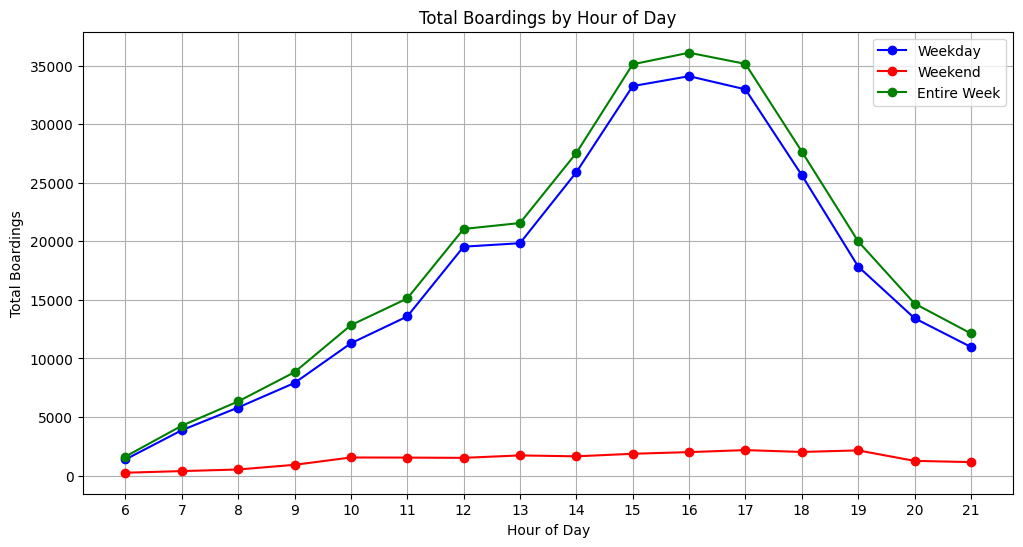

In [5]:
# Group the data by hour of day and weekend status, then calculate the total boardings
hourly_boardings_weekend = df.groupby(['hour_of_day', 'is_weekend'])['boarding'].sum().reset_index()
# Group the data by hour of day and calculate the total boardings for the entire week
hourly_boardings_all = df.groupby('hour_of_day')['boarding'].sum().reset_index()

# Create a time series plot for weekdays (is_weekend == 0)
plt.figure(figsize=(12, 6))
plt.plot(hourly_boardings_weekend[hourly_boardings_weekend['is_weekend'] == 0]['hour_of_day'],
         hourly_boardings_weekend[hourly_boardings_weekend['is_weekend'] == 0]['boarding'],
         marker='o', linestyle='-', color='b', label='Weekday')

# Create a time series plot for weekends (is_weekend == 1)
plt.plot(hourly_boardings_weekend[hourly_boardings_weekend['is_weekend'] == 1]['hour_of_day'],
         hourly_boardings_weekend[hourly_boardings_weekend['is_weekend'] == 1]['boarding'],
         marker='o', linestyle='-', color='r', label='Weekend')

# Create a time series plot for the entire week
plt.plot(hourly_boardings_all['hour_of_day'],
         hourly_boardings_all['boarding'],
         marker='o', linestyle='-', color='g', label='Entire Week')

plt.title('Total Boardings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Boardings')
plt.grid(True)
plt.xticks(hourly_boardings_all['hour_of_day'])  # Ensure all hours are shown on x-axis
plt.legend()
plt.show()

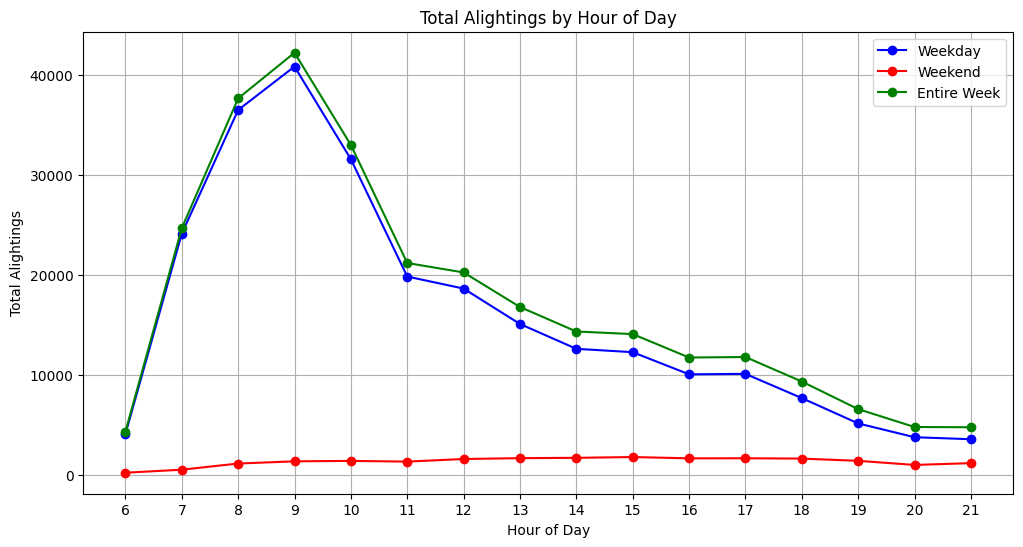

In [6]:
# Group the data by hour of day and weekend status, then calculate the total alightings
hourly_alightings_weekend = df.groupby(['hour_of_day', 'is_weekend'])['alighting'].sum().reset_index()
# Group the data by hour of day and calculate the total alightings for the entire week
hourly_alightings_all = df.groupby('hour_of_day')['alighting'].sum().reset_index()

# Create a time series plot for weekdays (is_weekend == 0)
plt.figure(figsize=(12, 6))
plt.plot(hourly_alightings_weekend[hourly_alightings_weekend['is_weekend'] == 0]['hour_of_day'],
         hourly_alightings_weekend[hourly_alightings_weekend['is_weekend'] == 0]['alighting'],
         marker='o', linestyle='-', color='b', label='Weekday')

# Create a time series plot for weekends (is_weekend == 1)
plt.plot(hourly_alightings_weekend[hourly_alightings_weekend['is_weekend'] == 1]['hour_of_day'],
         hourly_alightings_weekend[hourly_alightings_weekend['is_weekend'] == 1]['alighting'],
         marker='o', linestyle='-', color='r', label='Weekend')

# Create a time series plot for the entire week
plt.plot(hourly_alightings_all['hour_of_day'],
         hourly_alightings_all['alighting'],
         marker='o', linestyle='-', color='g', label='Entire Week')

plt.title('Total Alightings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Alightings')
plt.grid(True)
plt.xticks(hourly_alightings_all['hour_of_day'])  # Ensure all hours are shown on x-axis
plt.legend()
plt.show()

/var/folders/kg/6zcpy_5d1cv8qp9ktgjrvmrw0000gn/T/ipykernel_58935/284038433.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour_of_day', y='total_ridership', hue='day_of_week', data=df, ci=None)


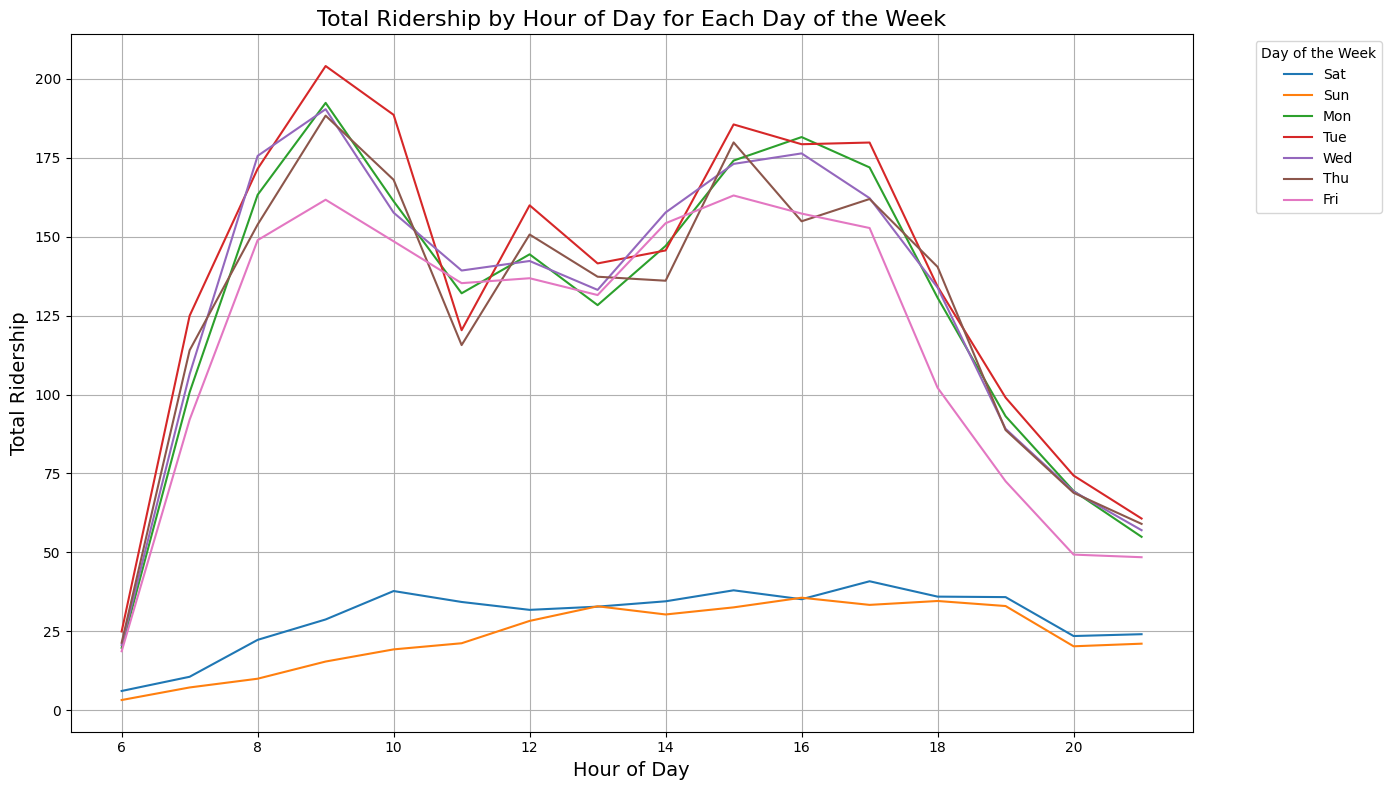

In [7]:

# Create a new column for total ridership (boarding + alighting)
df['total_ridership'] = df['boarding'] + df['alighting']

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a line plot of total ridership by hour of the day, faceted by day of the week
sns.lineplot(x='hour_of_day', y='total_ridership', hue='day_of_week', data=df, ci=None)

# Add titles and labels
plt.title('Total Ridership by Hour of Day for Each Day of the Week', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.grid(True)
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

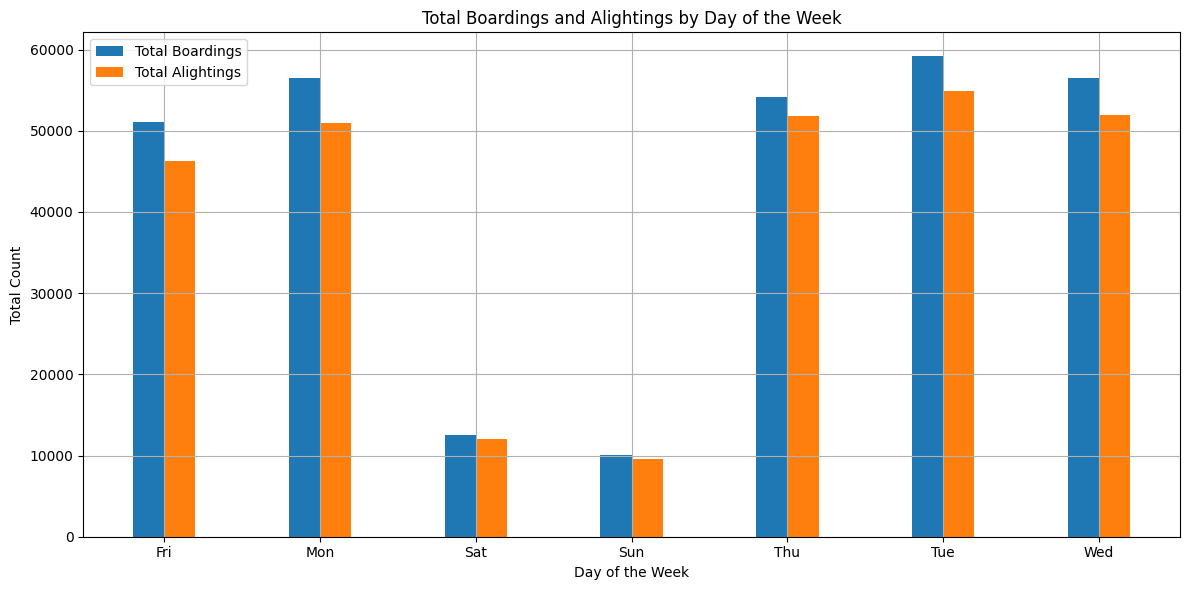

In [8]:
# Group the data by day of the week and calculate the total boardings and alightings
daily_boardings = df.groupby('day_of_week')['boarding'].sum().reset_index()
daily_alightings = df.groupby('day_of_week')['alighting'].sum().reset_index()

# Merge the two datasets for easy plotting
daily_totals = pd.merge(daily_boardings, daily_alightings, on='day_of_week')
daily_totals = daily_totals.rename(columns={'boarding': 'Total Boardings', 'alighting': 'Total Alightings'})

# Create a bar plot
plt.figure(figsize=(12, 6))

# Plotting boardings and alightings side by side
bar_width = 0.20
index = range(len(daily_totals))

plt.bar(index, daily_totals['Total Boardings'], width=bar_width, label='Total Boardings')
plt.bar([i + bar_width for i in index], daily_totals['Total Alightings'], width=bar_width, label='Total Alightings')

# Adding labels and titles
plt.title('Total Boardings and Alightings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Count')
plt.xticks([i + bar_width / 2 for i in index], daily_totals['day_of_week'])  # Center x-ticks between the bars
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/kg/6zcpy_5d1cv8qp9ktgjrvmrw0000gn/T/ipykernel_58935/4154597409.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_ridership = df.groupby(['hour_of_day', 'weekend', 'temperature_category'])['total_ridership'].sum().reset_index()


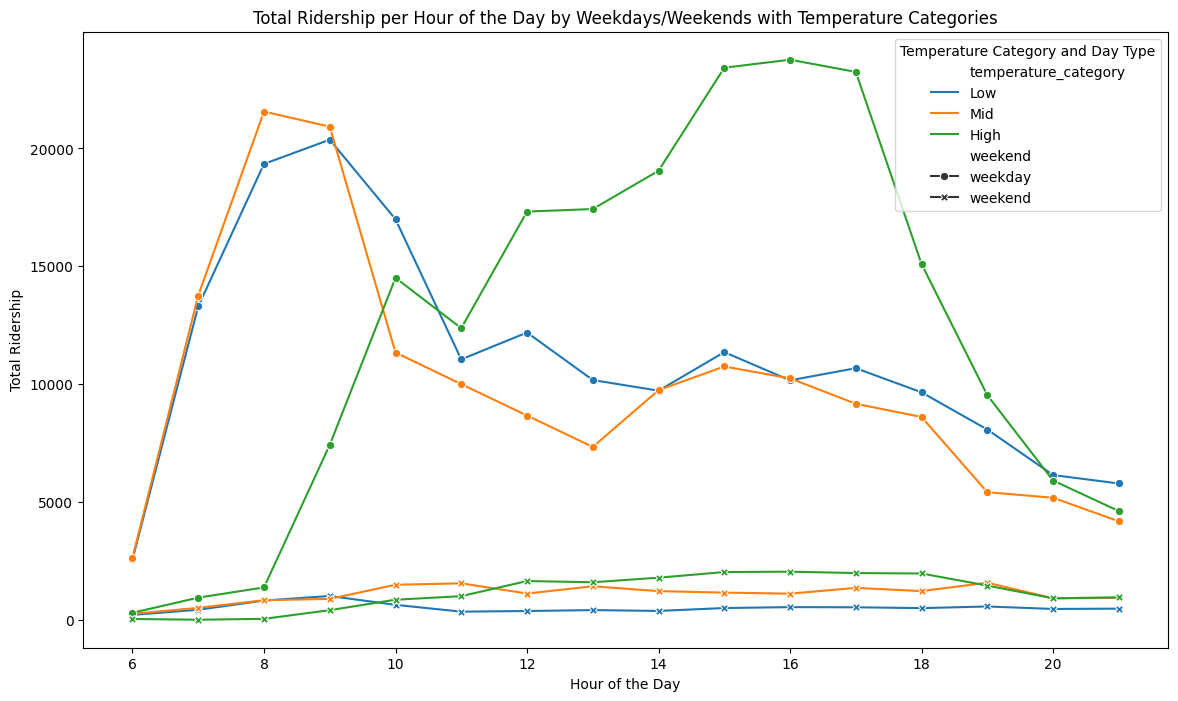

In [9]:
# Aggregate total ridership per hour, by temperature category and weekend status
df['temperature_category'] = pd.qcut(df['temperature'], q=3, labels=['Low', 'Mid', 'High'])
hourly_ridership = df.groupby(['hour_of_day', 'weekend', 'temperature_category'])['total_ridership'].sum().reset_index()

# Plotting the total ridership
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='hour_of_day', y='total_ridership', hue='temperature_category',
    style='weekend', markers=True, dashes=False, data=hourly_ridership,
    palette={'Low': '#1f77b4', 'Mid': '#ff7f0e', 'High': '#2ca02c'} 
)
plt.title('Total Ridership per Hour of the Day by Weekdays/Weekends with Temperature Categories')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Ridership')
plt.legend(title='Temperature Category and Day Type')
plt.show()


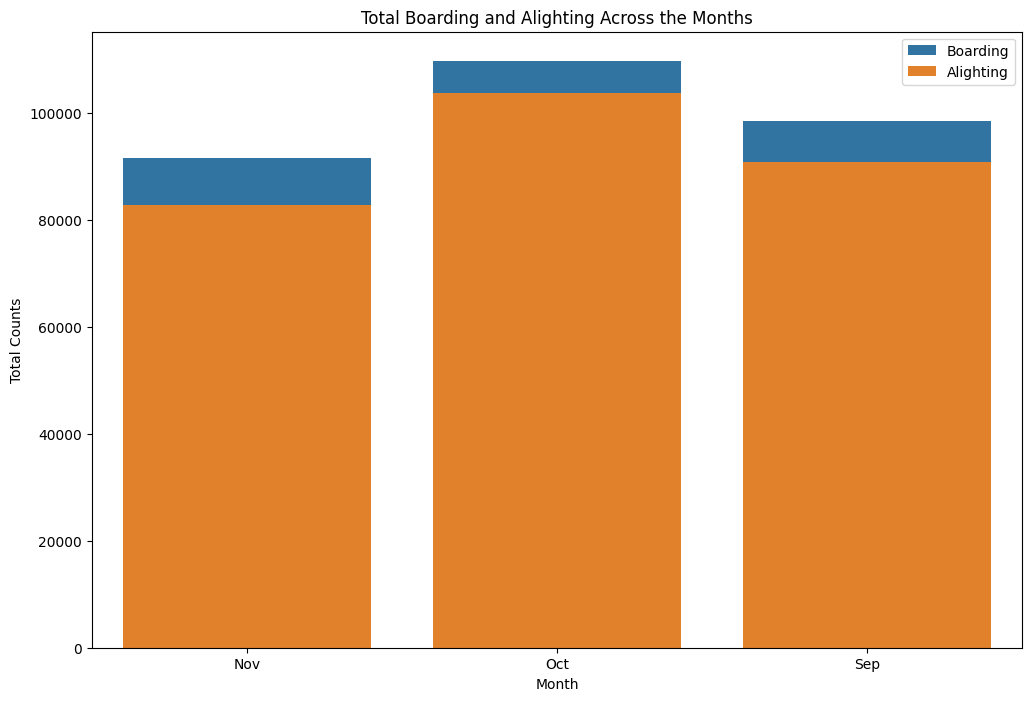

In [10]:
# Group the data by month and sum the boarding and alighting counts
monthly_totals = df.groupby('month')[['boarding', 'alighting']].sum().reset_index()

# Create a bar plot to visualize the total boarding and alighting across the months
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='boarding', data=monthly_totals, color='#1f77b4', label='Boarding')
sns.barplot(x='month', y='alighting', data=monthly_totals, color='#ff7f0e', label='Alighting')
plt.title('Total Boarding and Alighting Across the Months')
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.legend()
plt.show()

/var/folders/kg/6zcpy_5d1cv8qp9ktgjrvmrw0000gn/T/ipykernel_58935/457928836.py:2: FutureWarning: The provided callable <function sum at 0x113b87380> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  heatmap_data = df.pivot_table(index='hour_of_day', columns='day_of_week', values='total_ridership', aggfunc=np.sum)


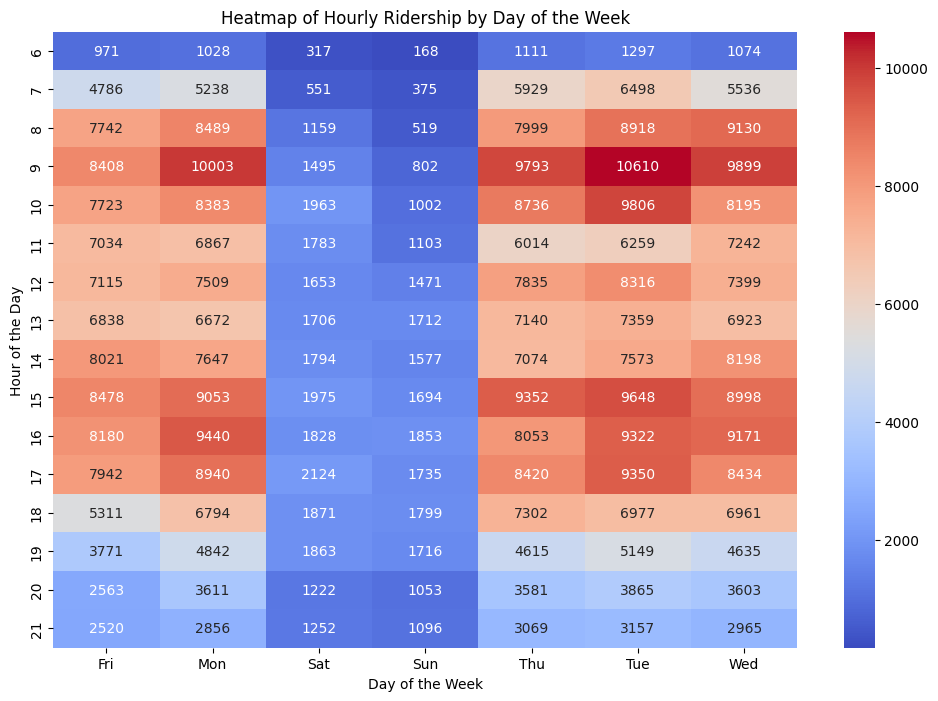

In [12]:
# Create a pivot table to prepare data for the heatmap
heatmap_data = df.pivot_table(index='hour_of_day', columns='day_of_week', values='total_ridership', aggfunc=np.sum)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Heatmap of Hourly Ridership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

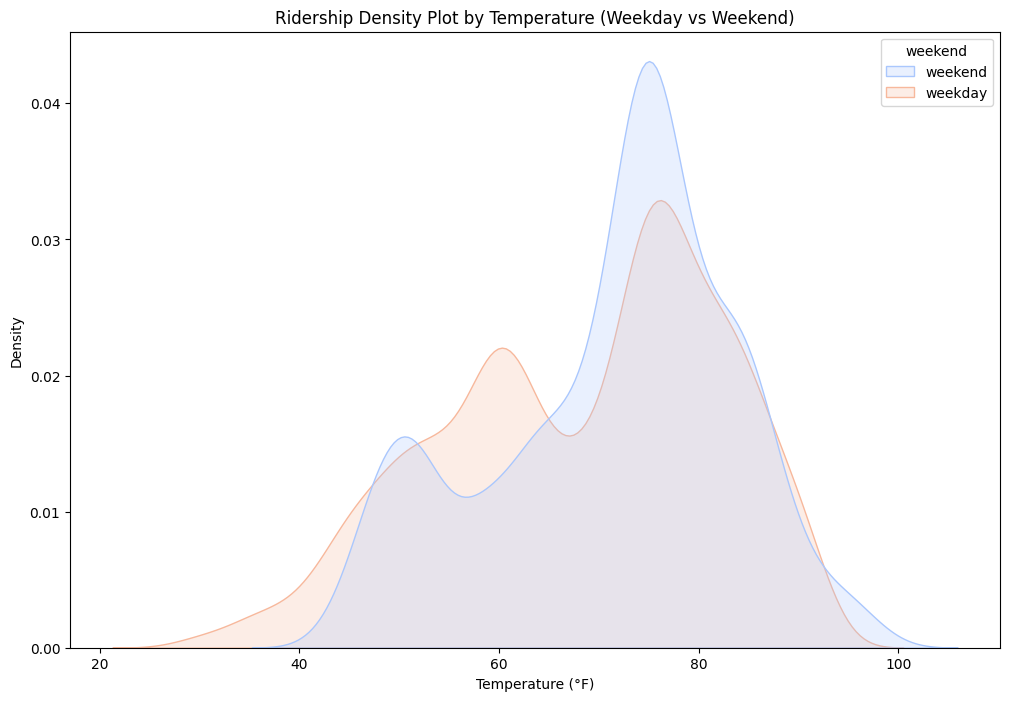

In [14]:
# Plot density of ridership by temperature, separated by weekend status
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='temperature', hue='weekend', fill=True, common_norm=False, palette='coolwarm')
plt.title('Ridership Density Plot by Temperature (Weekday vs Weekend)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Density')
plt.show()

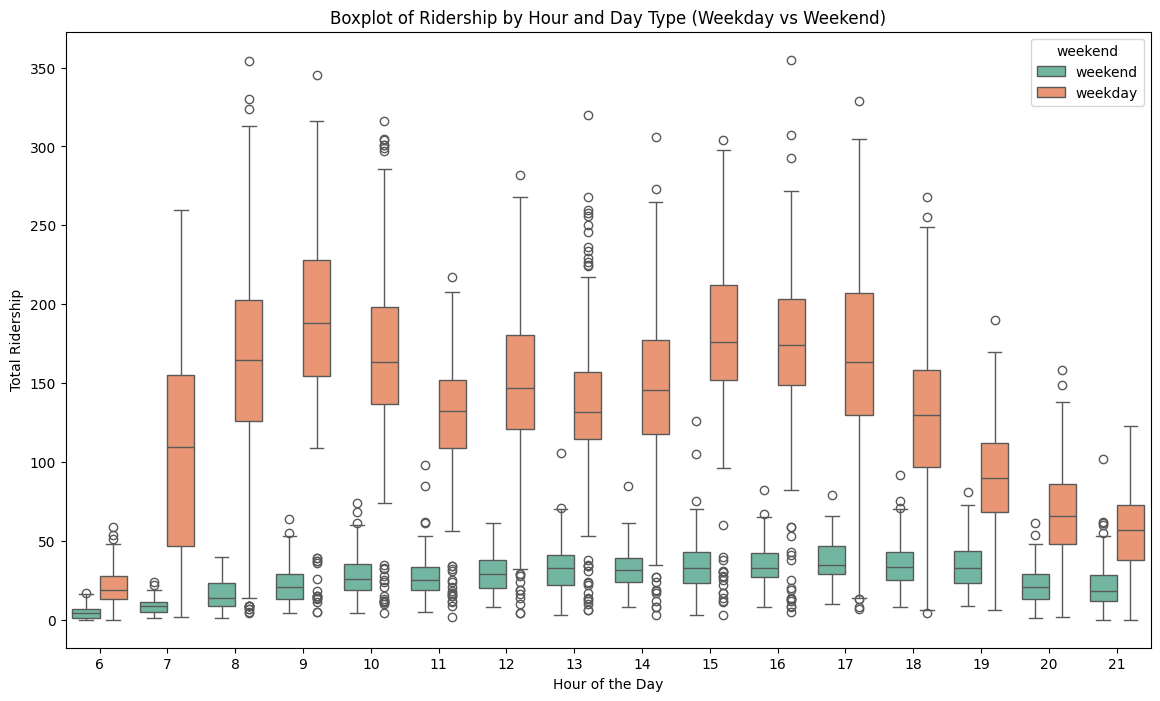

In [18]:
# Boxplot of ridership by hour, separated by weekend status
plt.figure(figsize=(14, 8))
sns.boxplot(x='hour_of_day', y='total_ridership', hue='weekend', data=df, palette='Set2')
plt.title('Boxplot of Ridership by Hour and Day Type (Weekday vs Weekend)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Ridership')
plt.show()